Now that we have a better understanding of HOLC areas and their histories, let's apply this knowledge to a dataset about tree canopy coverage to investigate disparities in these environments.

# Tree Canopy Coverage

##### Please make sure to run the cell below. This will import the tools we need to create the maps in the coming activities. You must run this everytime you reopen the notebook.

In [3]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re

# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]

# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

The data we are using is from the [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus). It contains the mean tree canopy rate in 2016 for 7 areas in California (San Francisco, Oakland, San Jose, Fresno, Stockton, Los Angeles, and San Diego). Each city is broken into different neighborhood based on HOLC areas.

*Here is more information on what our dataset contains:*

|Column Name| Meaning|
|---|---|
|holc_grade|HOLC letter grade for a certain neighborhood in a California area|
|area| City corresponding to a row in the dataset
|_count |number of parts in a neighborhood that are covered by a tree|
|_sum | total size of the neighborhood|
|_mean | Mean tree coverage for a specific neighborhood in a given area|
|geometry| Shape of the neighborhood that we use to create our map|

In [4]:
# Import data
holc_5072 = gpd.read_file('holc_ca_epsg5072_treecov').drop(columns=['name', 'holc_id', 'area_descr'])
holc_5072.head()

,holc_grade,area,_count,_sum,_mean,geometry
0,A,Oakland,7737.0,176517.0,22.814657,"POLYGON ((-2256129.514 1954655.076, -2256108.7..."
1,A,Berkeley,2130.0,17375.0,8.157277,"POLYGON ((-2258485.837 1965737.749, -2258407.4..."
2,A,Oakland,194.0,622.0,3.206186,"POLYGON ((-2258903.873 1954942.364, -2258949.8..."
3,A,Oakland,345.0,3700.0,10.724638,"POLYGON ((-2256129.514 1954655.076, -2256191.2..."
4,A,Berkeley,746.0,7629.0,10.226542,"POLYGON ((-2259866.714 1965745.875, -2259877.5..."


<div class="alert alert-warning">
<b>Question: </b> Looking at the first row in the table. What does an average tree canopy of 22.814 mean for Oakland? Is it significant that it is in an A-HOLC grade area?
</div>

*Answer Here:*

Let's compare these mean tree canopy scores across different HOLC grades. What possible relationship might there be?

# HOLC & Tree Canopy Coverage

We created groups where each represented a different HOLC grade. For each group, we calculated a new mean tree coverage score based on the total _count and _sum across all individual areas with the same HOLC grade.

In [5]:
summed = holc_5072.groupby('holc_grade').sum()
summed['_new_mean'] = summed['_sum'] / summed['_count']
summed['_holc_area'] = summed['_count'] / sum(summed['_count'])
summed['color'] = ['green', 'blue', 'yellow', 'red']
summed

,_count,_sum,_mean,_new_mean,_holc_area,color
holc_grade,,,,,,
A,158447.0,1949246.0,997.073556,12.302196,0.116667,green
B,278064.0,1660062.0,1227.833558,5.970072,0.204742,blue
C,575920.0,1537332.0,788.765300,2.669350,0.424057,yellow
D,345687.0,471935.0,257.113475,1.365209,0.254534,red


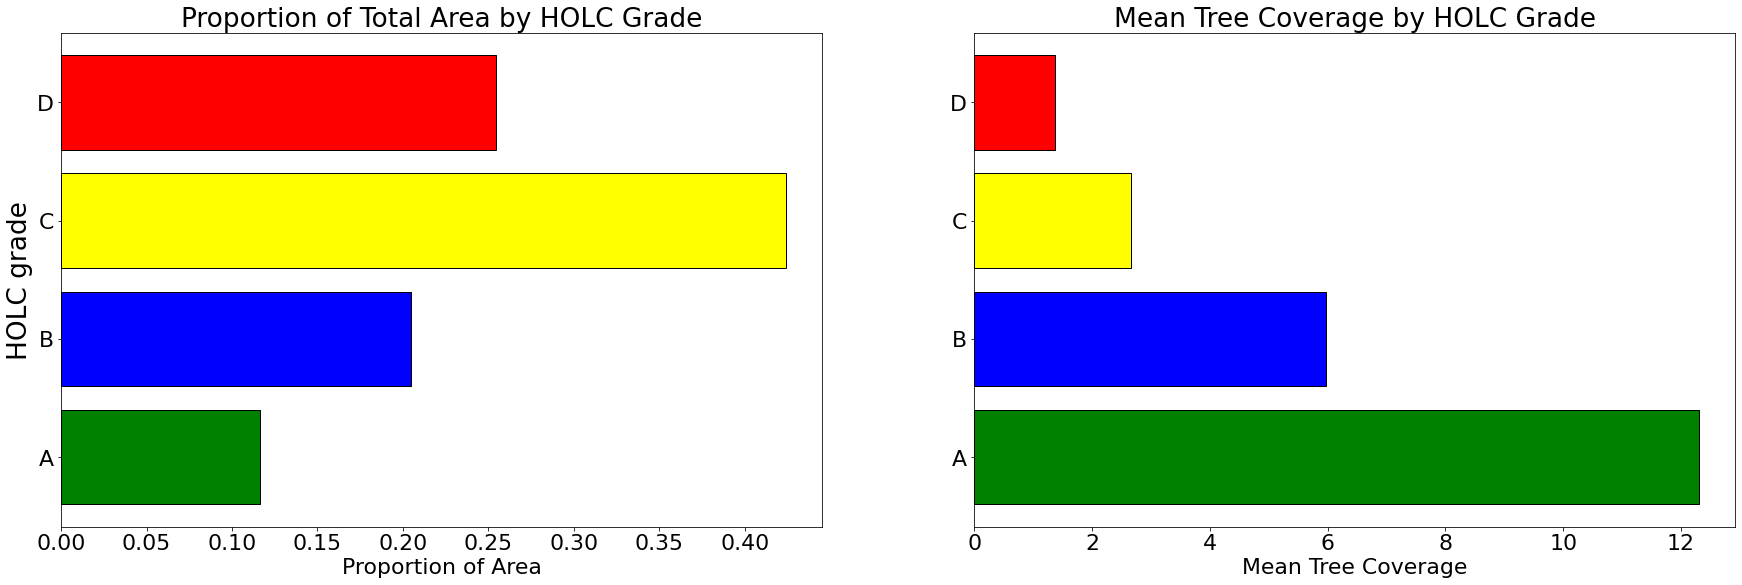

In [7]:
plt.rcParams.update({'font.size': 22})

fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax1.set_xlabel("Proportion of Area")
plt.barh(summed.index, summed["_holc_area"], color = summed['color'])

ax2=plt.subplot(2, 2, 2)
ax2.set_xlabel("Mean Tree Coverage")
plt.barh(summed.index, summed['_new_mean'], color=summed['color']);

ax1.set_ylabel('HOLC grade', fontsize='large');

ax1.set_title("Proportion of Total Area by HOLC Grade");
ax2.set_title("Mean Tree Coverage by HOLC Grade");

Consider the following to answer the question below:
- Which HOLC grade has the highest mean tree coverage? Which has the lowest?
- Which HOLC grades cover the largest area?

<div class="alert alert-warning">
<b>Question: </b> What are possible implications for neighborhoods in different HOLC areas in regards to mean tree canopy coverage?
</div>

*Answer Here:*

We have seen how tree coverage varies across different HOLC grades, but how does this relationship hold for individual cities. Let's map HOLC areas and tree coverage for different cities in California. 

# Mapping

Select a city in the dropdown menu. It will create side by side maps of the HOLC boundaries and the mean tree coverage for each of those areas.

In [2]:
%matplotlib inline
import ipywidgets as widgets

%run -i widget_script.py
widgets.VBox([widgets.VBox([inp]), out])

<div class="alert alert-warning">
<b>Question: </b> Based on the city you selected, what patterns do you notice from your plot above?
</div>

*Answer Here*

Credits:
- [National Land Cover Database](https://www.mrlc.gov/data/nlcd-2016-usfs-tree-canopy-cover-conus)
- Alexander Cui & Ashley Quiterio